In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from qiskit_metal import draw, Dict,designs
from qiskit_metal.qlibrary.core import BaseQubit
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
from qiskit_metal.draw import LineString
# import qiskit_metal as metal
from qiskit_metal import MetalGUI, Dict, Headings
from qiskit_metal.qlibrary.core.qroute import QRouteLead, QRoutePoint, QRoute
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.resonator.readoutres_fc import ReadoutResFC
from  qiskit_metal.qlibrary.user_components.my_qcomponent import  New_Transomon_Cross, RouteConnector,MyReadoutRes01,MyFluxLine01
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.sample_shapes.circle_raster import CircleRaster
import  math
import numpy as np

In [60]:
# Initialise design
design = designs.DesignPlanar()
# Specify design name
design.metadata['design_name'] = 'FlipChip_Device'
# launch GUI
gui = MetalGUI(design)
# Allow running the same cell here multiple times to overwrite changes
design.overwrite_enabled = True

In [61]:
# Create a new circle object
class Circle(QComponent):
    """A single configurable circle.

    Inherits QComponent class.

    .. image::
        CircleRaster.png

    .. meta::
        Circle Raster

    Default Options:
        * radius: '300um'
        * resolution: '16'
        * cap_style: 'round' -- Valid options are 'round', 'flat', 'square'
        * subtract: 'False'
        * helper: 'False'
    """

    default_options = dict(
        radius='500um',
        linewidth ='0.1 um',
        resolution='16',
        cap_style='round',  # round, flat, square
        # join_style = 'round', # round, mitre, bevel
        # General
        subtract='False',
        helper='False')
    """Default drawing options"""

    TOOLTIP = """A single configurable circle"""

    def make(self):
        """The make function implements the logic that creates the geoemtry
        (poly, path, etc.) from the qcomponent.options dictionary of
        parameters, and the adds them to the design, using
        qcomponent.add_qgeometry(...), adding in extra needed information, such
        as layer, subtract, etc."""
        p = self.p  # p for parsed parameters. Access to the parsed options.

        # create the geometry
        center = draw.Point(p.pos_x,p.pos_y)
        radius = p.radius
        linewidth = p.linewidth
        circle =draw.shapely. LinearRing(center.buffer(radius).exterior.coords).buffer(linewidth)
        # inner_ring = draw.shapely.LinearRing(center.buffer(radius-linewidth).exterior.coords)
        # circle = outer_ring.difference(inner_ring)
        # Add the circle to the design
        # design.qgeometry.add_qgeometry(kind='poly',component_name='my_circle', geometry={'circle':circle},)
        #
        #     #join_style = getattr(JOIN_STYLE, p.join_style)
        # )

        # add qgeometry
        self.add_qgeometry('poly', {'circle': circle},
                           subtract=p.subtract,
                           helper=p.helper,
                           layer=p.layer,
                           chip=p.chip)


# Draw the design
mycircle = Circle(design,'mycircle')
gui.rebuild()
gui.autoscale()
# gui.zoom_on_components(['my_circle'])


In [13]:
circle.options

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'radius': '300um',
 'resolution': '16',
 'cap_style': 'round',
 'subtract': 'False',
 'helper': 'False'}

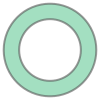

In [51]:
center = draw.Point(0,0)
radius = 5
outer_ring =draw.shapely. LinearRing(center.buffer(radius).exterior.coords).buffer(1)
# inner_ring = draw.shapely.LinearRing(center.buffer(radius-4).exterior.coords)
# circle = outer_ring.difference(inner_ring)
outer_ring

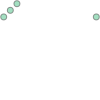

In [15]:
points = []
N=14
size = 10.0
for i in range(N):
    shape = draw.Point(-size/2+i*size/N,size/2)
    points.append(shape)
# for i in range(N):
#     shape = draw.Point(size/2,size/2-i*size/N)
x = draw.shapely.geometrycollections(points)
x0 = draw.rotate(x,90,origin=(0,0))
x1 = draw.rotate(x0,90,origin=(0,0))
x2 = draw.rotate(x1,90,origin=(0,0))
square = draw.shapely.geometrycollections([x,x0,x1,x2])
square = draw.rotate(square,45,origin=(0,0))
square_coords =[]
for i in range(4):
    for j in range(N):
        square_coords.append(square.geoms[i].geoms[j].coords[0])

draw.shapely.geometrycollections([square.geoms[0].geoms[:3],draw.Point(0,0)])
# square.geoms[1]

In [14]:
opt=Dict(pos_x=0 , pos_y=0, orientation='-45', pad_width='245 um', pad_height='245 um', pad_gap = '100 um', lead_length = '176 um', chip = 'C_chip')
opt_a=Dict(pos_x=0 , pos_y=0, orientation='45', pad_width='245 um', pad_height='245 um', pad_gap = '100 um', lead_length = '176 um', chip = 'C_chip')
opt_b=Dict(pos_x=0 , pos_y=0, orientation='135', pad_width='245 um', pad_height='245 um', pad_gap = '100 um', lead_length = '176 um', chip = 'C_chip')
opt_c=Dict(pos_x=0 , pos_y=0, orientation='-135', pad_width='245 um', pad_height='245 um', pad_gap = '100 um', lead_length = '176 um', chip = 'C_chip')
# test = OpenToGround(design, 'open01', options=Dict(pos_x='-3 mm',  pos_y=pos_y_zline+0.02, orientation='-45', chip ='C_chip'),)
launch_zline = LaunchpadWirebond(design,'launch_zline',options=opt)
launch_zline_a = LaunchpadWirebond(design,'launch_zline_a',options=opt_a)
launch_zline_b = LaunchpadWirebond(design,'launch_zline_b',options=opt_b)
launch_zline_c = LaunchpadWirebond(design,'launch_zline_c',options=opt_c)
gui.rebuild()
gui.autoscale()

In [15]:
design.delete_all_components()
launch_list = []
for i in range(4):
    for j in range(N):
         if (i==0):
            launch_list.append(design.copy_qcomponent(launch_zline,'launch_zline'+str(i)+str(j), Dict(pos_x =square_coords[i*N+j][0] ,pos_y=square_coords[i*N+j][1])))
         elif (i==1):
             launch_list.append(design.copy_qcomponent(launch_zline_a,'launch_zline'+str(i)+str(j), Dict(pos_x =square_coords[i*N+j][0] ,pos_y=square_coords[i*N+j][1])))
         elif (i==2):
             launch_list.append(design.copy_qcomponent(launch_zline_b,'launch_zline'+str(i)+str(j), Dict(pos_x =square_coords[i*N+j][0] ,pos_y=square_coords[i*N+j][1])))
         else:
             launch_list.append(design.copy_qcomponent(launch_zline_c,'launch_zline'+str(i)+str(j), Dict(pos_x =square_coords[i*N+j][0] ,pos_y=square_coords[i*N+j][1])))
# launch_list.append(design.copy_qcomponent(launch_zline,'launch_zline'+str(15), Dict(pos_x =square_coords[15][0] ,pos_y=square_coords[15][1])))
gui.rebuild()
gui.autoscale()

